In [1]:
%matplotlib inline

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make('CartPole-v0')

In [4]:
def run_episode(env, parameters, render=False, maxTime=200):
    observation = env.reset()
    totalreward = 0
    for _ in range(maxTime):
        if render:
            env.render()
        action = 0 if np.matmul(parameters, observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

In [5]:
parameters = np.random.rand(4) * 2 - 1

In [12]:
run_episode(env, parameters,render=True)

169.0

# Random search 

In [26]:
def random_search(max_iterations):
    bestparams = None
    bestreward = 0
    for i in range(max_iterations):
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env, parameters, render=False)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            if reward == 200:
                break
    return (bestparams, bestreward, i)

In [27]:
data = []
for _ in range(1000):
    params, reward, count = random_search(100)
    if reward == 200:
        data = data + [count]

(array([559., 204., 120.,  62.,  22.,  21.,   4.,   3.,   2.,   2.]),
 array([ 0. ,  9.2, 18.4, 27.6, 36.8, 46. , 55.2, 64.4, 73.6, 82.8, 92. ]),
 <a list of 10 Patch objects>)

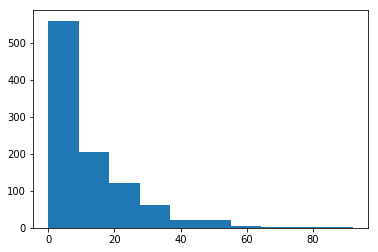

In [28]:
plt.hist(data)

In [37]:
print("Average number of tries: {} +/- {}".format(np.mean(data),np.std(data)))

Average number of tries: 12.297297297297296 +/- 13.081047990097044


In [14]:
bestparams, bestreward, count = random_search(100)

In [23]:
run_episode(env, bestparams, render=True)

200.0

In [24]:
env.close()

# Random hill climbing

In [38]:
def hill_climb(noise_scale, max_iterations, episodes_per_update=1):
    parameters = np.random.rand(4)*2-1
    bestreward = 0
    for i in range(max_iterations):
        newparams = parameters + noise_scale * (np.random.rand(4)*2-1)
        reward = 0
        for _ in range(episodes_per_update):
            reward += run_episode(env, newparams)
        if reward > bestreward:
            bestreward = reward
            parameters = newparams
            if reward == 200*episodes_per_update:
                break
    return (parameters, bestreward, i)

In [50]:
data = []
for _ in range(100):
    params, reward, count = hill_climb(0.1, 200, 1)
    data = data + [count]

(array([18.,  3.,  2.,  0.,  0.,  1.,  1.,  0.,  1., 74.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

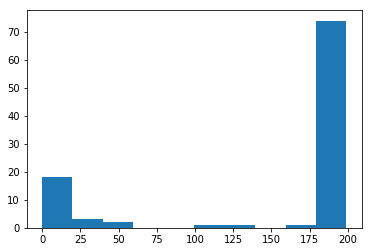

In [51]:
plt.hist(data)

In [57]:
np.mean(np.array(data)[np.array(data) < 199])

32.18518518518518

This approach is somewhat questionable. Maybe I am misunderstanding something, but it seems to me that part of the problem is that the results for a given set of weights vary widly (since the initial conditions are random).

# Policy gradients

In [65]:
?itertools

In [ ]:
1